This notebook reproduces plots in Figures 1, S1, and S2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

Figure 1D

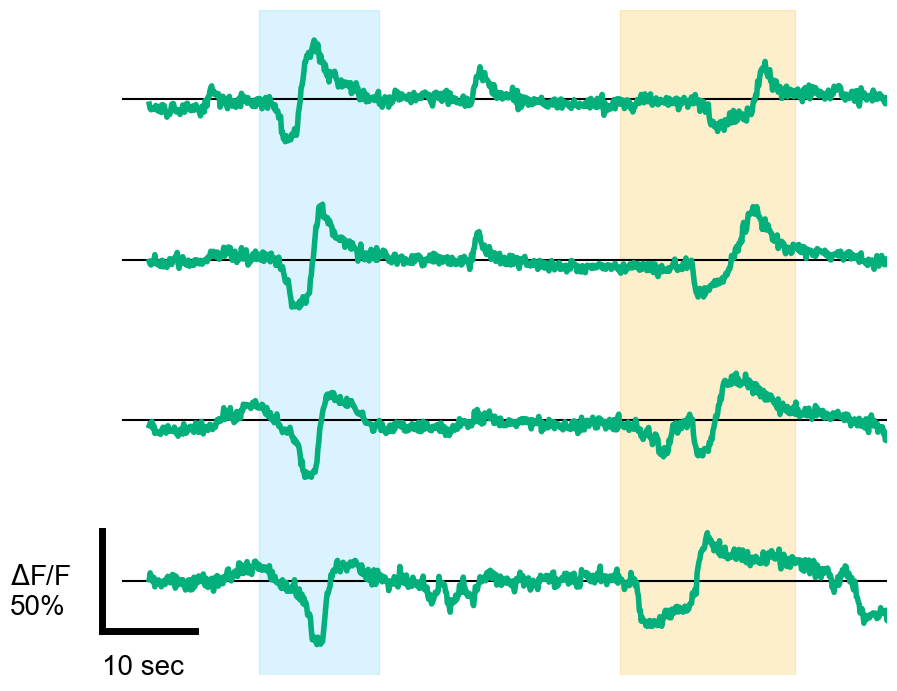

In [2]:
#load fluorescence trace data (time stamps, average fluorescence values of A02l neurons)
traces=pd.read_csv('../data/Fig1_S1_S2/Fig1E_data/202111010_R13B07_Gal4_GCaMP_sample2_traces.csv')
dt_frame=traces['time'][1]-traces['time'][0] #time interval between frames

# define lowpass filter functions
def butter_lowpass(lowcut, fs, order=4):
    '''butterworth power pass filter
    '''
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = scipy.signal.butter(order, low, btype='low')
    return b, a
def butter_lowpass_filter(x, lowcut, fs, order=4):
    '''lowpass_filter
    '''
    b, a = butter_lowpass(lowcut, fs, order=order)
    y = scipy.signal.filtfilt(b, a, x,  padtype='even', padlen=int(10.0/dt_frame))
    return y
def dF_F_lowpass_base(F, dt):
    lowpass_base=butter_lowpass_filter(F, 0.01, 1.0/dt) #only use signals slower than 0.01 Hz
    return (F-lowpass_base)/lowpass_base

#calculate dF/F with lowpass baseline
dF_F={}
for key in traces.keys():
    dF_F[key]=dF_F_lowpass_base(traces[key], dt_frame)
dF_F['time'] = traces['time']

#plot dF/F traces of A02l neurons in A4-7 segments (Figure 1D)
fig = plt.figure(figsize=(9,7)); ax = fig.add_subplot(111);
plt.rcParams["font.family"] = "Arial"
plt.axvspan(32,45, color=(77/255,196/255,255/255), alpha=0.2)
plt.axvspan(71,90, color=(246/255,170/255,0/255), alpha=0.2)  
step=0.8
for i in range(4):
    plt.axhline(y=step*i, xmin=0.08, xmax=1,color='k', linestyle='-', lw=1.5)
for i in range(7):
    key='A02l_A'+str(i+1)+'R'
    if key in dF_F.keys():
        plt.plot(dF_F['time'][dF_F['time']>20],dF_F[key][dF_F['time']>20]+step*(6-i),label=key, c=(3/255,175/255,122/255), lw=4)
plt.xlim(10,100)
ax.axis("off")
ax.plot([15,15,15,15], [-0.25,-0.25,0.25,0.25], lw=5, c='k')
ax.plot([15,15,25,25], [-0.25,-0.25,-0.25,-0.25], lw=5, c='k')
ax.text(5,-0.2, "$\Delta$F/F \n50%", ha='left', va='bottom', c='k', fontsize=20)
ax.text(15,-0.5, "10 sec", ha='left', va='bottom', rotation='horizontal', c='k', fontsize=20)
plt.tight_layout()
plt.savefig('./figures/Fig1D.svg')

Figure S1F

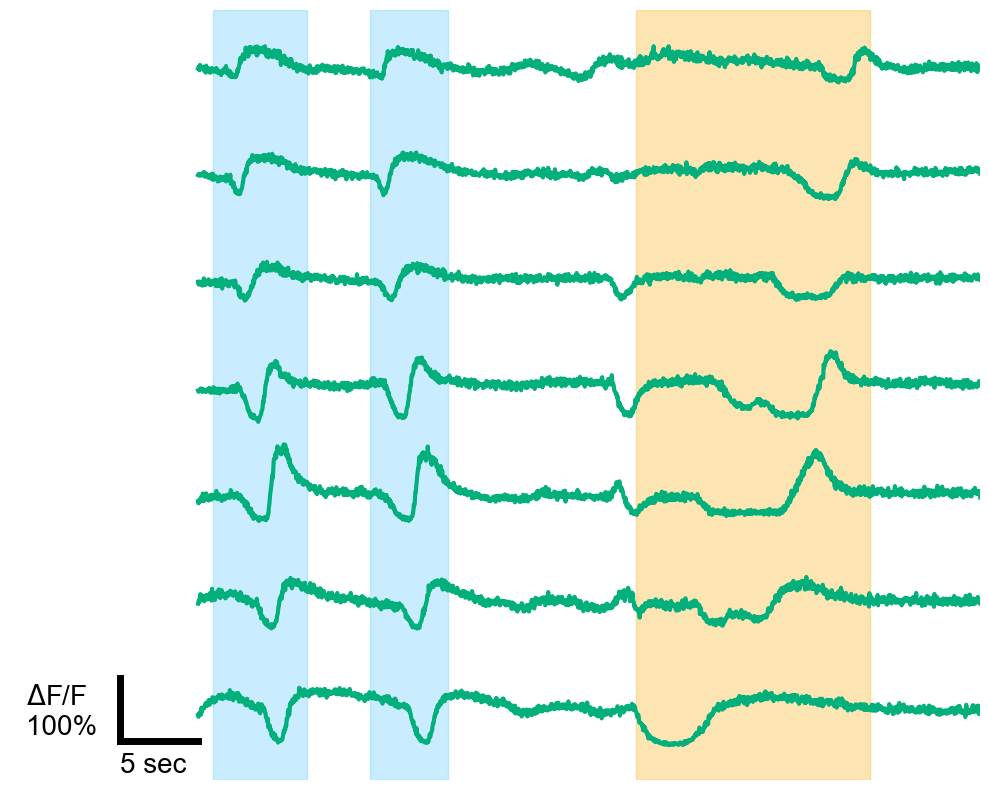

In [3]:
#load fluorescence trace data (time stamps, average fluorescence values of A02l neurons)
traces=pd.read_csv('../data/Fig1_S1_S2/FigS1F_data/240828_A02l_split1_sample2_traces.csv')
dt_frame=traces['time'][1]-traces['time'][0] #time interval between frames

# define lowpass filter functions
def butter_lowpass(lowcut, fs, order=4):
    '''butterworth power pass filter
    '''
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = scipy.signal.butter(order, low, btype='low')
    return b, a

def butter_lowpass_filter(x, lowcut, fs, order=4):
    '''lowpass_filter
    '''
    b, a = butter_lowpass(lowcut, fs, order=order)
    y = scipy.signal.filtfilt(b, a, x)
    return y

def dF_F_lowpass_base(F, dt):
    lowpass_base=butter_lowpass_filter(F, 0.02, 1.0/dt) #only use signals slower than 0.02 Hz (~50 sec transients)
    return (F-lowpass_base)/lowpass_base

#calculate dF/F with lowpass baseline
# compute dF/F
dF_F={}
for key in traces.keys():
    dF_F[key]=dF_F_lowpass_base(traces[key], dt_frame)
dF_F['time'] = traces['time']

#plot dF/F traces of A02l neurons in A1-7 segments (Figure S1F)
fig = plt.figure(figsize=(10,8)); ax = fig.add_subplot(111);
plt.rcParams['font.family']='Arial'
plt.axvspan(101,107,color=(77/255,196/255,255/255), alpha=0.3)
plt.axvspan(111,116,color=(77/255,196/255,255/255), alpha=0.3)
plt.axvspan(128,143,color=(246/255,170/255,0/255), alpha=0.3)
step=1.7
for i in range(7):
    key='A02l_A'+str(i+1)+'R'
    plt.plot(dF_F['time'][dF_F['time']>100],dF_F[key][dF_F['time']>100]+step*(6-i),label=key, c=(3/255,175/255,122/255), lw=3)
plt.xlim(88, 150)
ax.axis("off")
ax.plot([95,95,95,95], [-0.5,-0.5,0.5,0.5], lw=5, c='k')
ax.plot([95,95,100,100], [-0.5,-0.5,-0.5,-0.5], lw=5, c='k')
ax.text(89,-0.5, "$\Delta$F/F\n100%", ha='left', va='bottom', c='k', fontsize=20)
ax.text(95,-1.1, "5 sec", ha='left', va='bottom', c='k', fontsize=20)
plt.tight_layout()
plt.savefig('./figures/FigS1F.svg')

Figures 1J, 1K, S2A, S2B

In [ ]:
#Fig S2A


In [ ]:
#Fig S2B


Figures 1M-O, S1D, S1F